Name - Aditya Kothari

Roll no. - I028

Batch - B1


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.datasets import fetch_lfw_people

Part - A


In [4]:
#Generating Dataset
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)

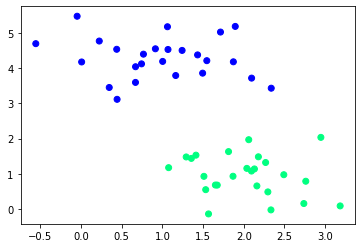

In [5]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')

As we decrease the standard deviation, the variance of the values of the elements in the clusters decreases and the values comes closer and vice versa.

In [6]:
xfit=np.linspace(-1,3.5)
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

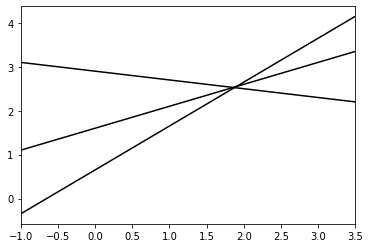

In [7]:
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
  plt.plot(xfit,m*xfit+b,'k')
  plt.xlim(-1,3.5)

In [8]:
print(m,b)

-0.2 2.9


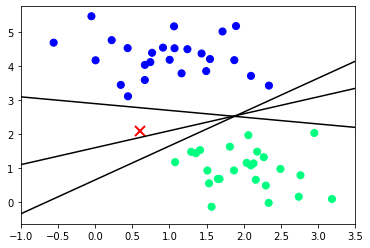

In [9]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
  plt.plot(xfit,m*xfit+b,'k')
  plt.xlim(-1,3.5)

In [10]:
model=SVC(kernel='linear',C=1E10)
model.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

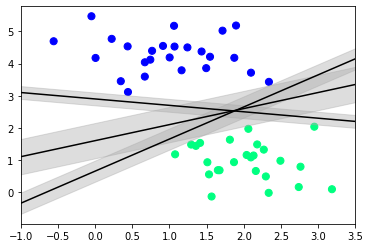

In [11]:
xfit = np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
  yfit=m*xfit+b
  plt.plot(xfit,yfit,'-k')
  plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);

In [15]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
  ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()

  x=np.linspace(xlim[0],xlim[1],30)
  y=np.linspace(ylim[0],ylim[1],30)

  Y,X = np.meshgrid(y,x)
  xy=np.vstack([X.ravel(),Y.ravel()]).T

  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])

  ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none')

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

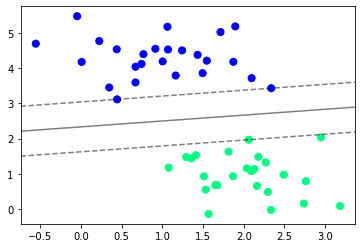

In [16]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model);

Part - B

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

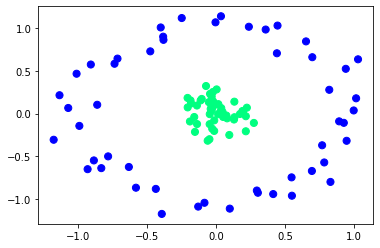

In [36]:
X,y=make_circles(100,factor=0.1,noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

As the noise increases, the standard deviation of the values increases. When the noise is 0, the values from a perfect circle.

When the factor increases, the values become closer to each other and vice versa.

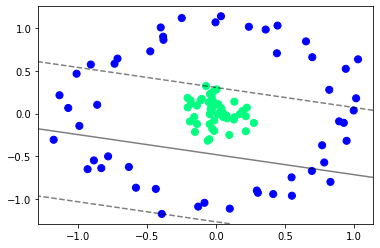

In [37]:
clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf,plot_support=False);

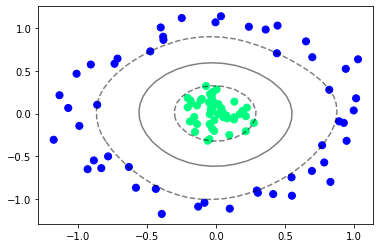

In [57]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=300, lw=1, facecolors = 'none')

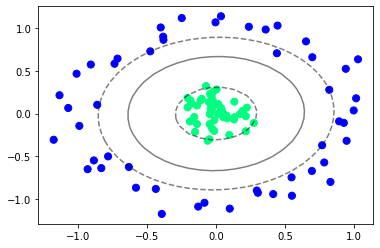

In [56]:
clf1 = SVC(kernel='poly',degree=2)
clf1.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(clf1)
plt.scatter(clf1.support_vectors_[:,0],clf1.support_vectors_[:,1], s=300, lw=1, facecolors = 'none')

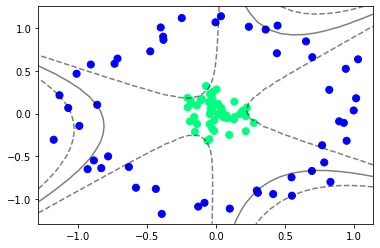

In [55]:
clf1 = SVC(kernel='poly',degree=3)
clf1.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(clf1)
plt.scatter(clf1.support_vectors_[:,0],clf1.support_vectors_[:,1], s=300, lw=1, facecolors = 'none')

Part - C

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
fig,ax =plt.subplots(3,5)
for i in axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])